IE 7300: Statistical learning for Engineering
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<h1><center><font size="7">Project check point #3</font></center></h1>
<center><font size="3">Weihua Pan</font></center>
<center><font size="3">206-822-8347</font></center>
<center><font size="3">pan.weih@northeastern.edu</font></center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<font size="3">Percentage of Effort Contributed by Student : 100%</font><br>
<font size="3">Signature of Student : Weihua Pan</font><br>
<font size="3">Submission Date: 11/28/2023</font><br>

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',30)

# a) Problem Statement 

##  Clearly define the  problem statement 

<strong>Problem statement <strong>: To determine whether some features of Mushroom,such as `cap diameter`, `cap shape` and `cap color`,can be used to predict its edibility.

## State your hypothesis 

<strong> Hypothesis <strong>: Mushrooms with specify feature characteristic are more likely to be edible or poisonous.

# Dataset

## Present the dataset and include a data dictionary

In [224]:
df = pd.read_csv("MushroomDataset/secondary_data.csv",sep=";")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


The dataset contains 61069 rows and 21 columns. The target variable is class (e or p).

In [225]:
df.select_dtypes(include='object')

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,w
1,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,u
2,p,x,g,o,f,e,NaN,w,s,y,w,u,w,t,g,NaN,d,w
3,p,f,h,e,f,e,NaN,w,s,y,w,u,w,t,p,NaN,d,w
4,p,x,h,o,f,e,NaN,w,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,s,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,f,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,s,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,f,s,y,f,f,f,f,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


17 of them are categorical feature :['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']<br> I will do one-hot-encode later.

In [226]:
df.select_dtypes(include='number')

,cap-diameter,stem-height,stem-width
0,15.26,16.95,17.09
1,16.60,17.99,18.19
2,14.07,17.80,17.74
3,14.17,15.77,15.98
4,14.64,16.53,17.20
...,...,...,...
61064,1.18,3.93,6.22
61065,1.27,3.18,5.43
61066,1.27,3.86,6.37
61067,1.24,3.56,5.44


3 of them are numerical: ['cap-diameter', 'stem-height', 'stem-width']. 

### Dataset Dictionary

Target variable: `class` divided in edible=e and poisonous=p
<br>
n: nominal, m: metrical<br>
<br>
1. cap-diameter (m): float number in cm
2. cap-shape (n): 
    * bell=b, 
    * conical=c, 
    * convex=x, 
    * flat=f,
    * sunken=s, 
    * spherical=p, 
    * others=o
3. cap-surface (n): 
    * fibrous=i,
    * grooves=g, 
    * scaly=y, 
    * smooth=s,
    * shiny=h, 
    * leathery=l, 
    * silky=k, 
    * sticky=t,
    * wrinkled=w, 
    * fleshy=e
4. cap-color (n): 
    * brown=n, 
    * buff=b, 
    * gray=g, 
    * green=r, 
    * pink=p,
    * purple=u, 
    * red=e, 
    * white=w, 
    * yellow=y, 
    * blue=l,
    * orange=o, 
    * black=k
5. does-bruise-bleed (n): 
    * bruises-or-bleeding=t,
    * no=f
6. gill-attachment (n): 
    * adnate=a, 
    * adnexed=x, 
    * decurrent=d, 
    * free=e,
    * sinuate=s, 
    * pores=p, 
    * none=f, 
    * unknown=?
7. gill-spacing (n): 
    * close=c, 
    * distant=d, 
    * none=f
8. gill-color (n): 
    * see cap-color + 
    * none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): 
    * bulbous=b, 
    * swollen=s, 
    * club=c, 
    * cup=u, 
    * equal=e,
    * rhizomorphs=z, 
    * rooted=r
12. stem-surface (n): 
    see cap-surface + none=f
13. stem-color (n): 
see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): 
    * ring=t, 
    * none=f
17. ring-type (n): 
    * cobwebby=c, 
    * evanescent=e, 
    * flaring=r, 
    * grooved=g,
    * large=l, 
    * pendant=p, 
    * sheathing=s, 
    * zone=z, 
    * scaly=y, 
    * movable=m, 
    * none=f, 
    * unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): 
    * grasses=g, 
    * leaves=l, 
    * meadows=m, 
    * paths=p, 
    * heaths=h,
    * urban=u, 
    * waste=w, 
    * woods=d
20. season (n): 
    * spring=s, 
    * summer=u, 
    * autumn=a, 
    * winter=w

Most of the columns are categorical, so I need to do one-hot-encoding for these categorical data in order to train a model

## Explain how this dataset supports your hypothesis

In [227]:
# split mushrooms df into poison and edible df.
poison = df[df['class']=='p']
edible = df[df['class']=='e']

In [228]:
print(poison.shape)
print(edible.shape)

(33888, 21)
(27181, 21)


In [229]:
p_color = poison['cap-color'].value_counts().index
p_counts = poison['cap-color'].value_counts().values
e_color = edible['cap-color'].value_counts().index
e_counts = edible['cap-color'].value_counts().values

In [230]:
color_code = {"n":"brown",
             "b":"#f0dc82", #buff
             "g":"gray", 
             "r":"green", 
             "p":"pink",
             "u":"purple", 
             "e":"red", 
             "w":"white", 
             "y":"yellow", 
             "l":"blue",
             "o":"orange", 
             "k":"black"}

In [231]:
color_map = {"n":"brown",
             "b":"buff", #buff
             "g":"gray", 
             "r":"green", 
             "p":"pink",
             "u":"purple", 
             "e":"red", 
             "w":"white", 
             "y":"yellow", 
             "l":"blue",
             "o":"orange", 
             "k":"black"}

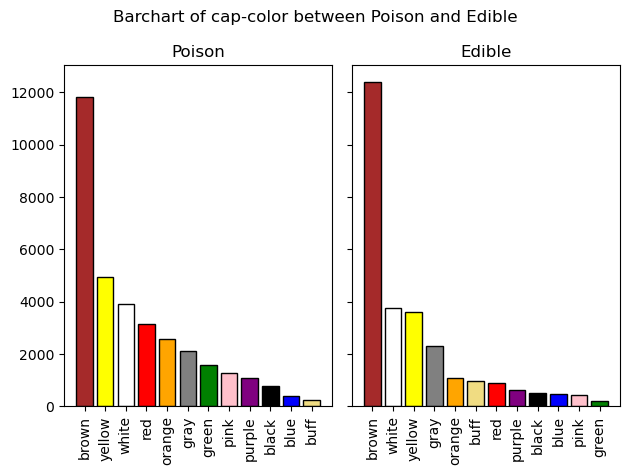

In [232]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(1,2,sharey=True)

ax[0].bar([color_map[c] for c in p_color],p_counts,color=[color_code[code] for code in p_color],
          edgecolor='black')
ax[0].set_title('Poison')

# 
ax[1].bar([color_map[c] for c in e_color],e_counts,color=[color_code[code] for code in e_color],
          edgecolor='black')
ax[1].set_title('Edible')

# rotate xlabels
ax[0].set_xticklabels([color_map[c] for c in p_color],rotation=90)
ax[1].set_xticklabels([color_map[c] for c in e_color],rotation=90)

fig.suptitle("Barchart of cap-color between Poison and Edible")
plt.tight_layout()
plt.show()

Using `cap-color` and other features, we are able to find some pattern to classify base on these features. For example, From the above plot, We can see most green and red mushroom are poisonous. In addition, the most common color is brown for both poison and edible mushrooms, Therefore, it might be tough to use brown to classify whether a mushroom is poisonous or edible.

# Exploratory Data Analysis(EDA)

## Descriptive Statistics

In [233]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Only 3 columns are numerical.<br>
1. cap-diameter:
    * min: 0.38 cm
    * max: 62.34 cm
    * mean 6.7 cm
2. stem-height:
    * min: 0 cm
    * max: 33.92 cm
    * mean 6.58 cm
3. stem-width:
    * min: 0 cm
    * max: 103.91 cm
    * mean: 10.03 cm

Base on the basic statistic, I can take a guess `cap-diameter` and `stem-height` are in right skewed, and `stem-width` is about normal by mean and 50% quartile. And they all have some outliers. I will consider whether remove them later.

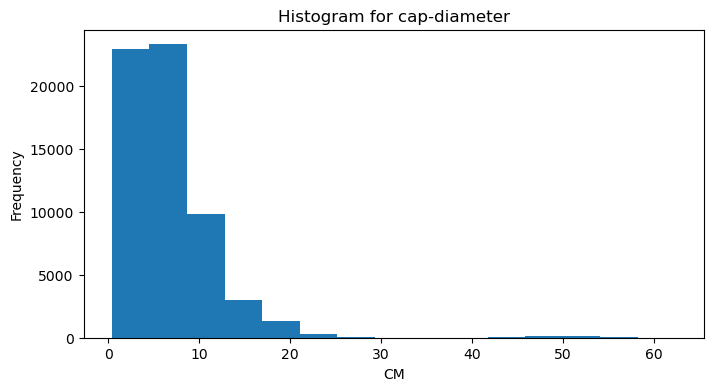

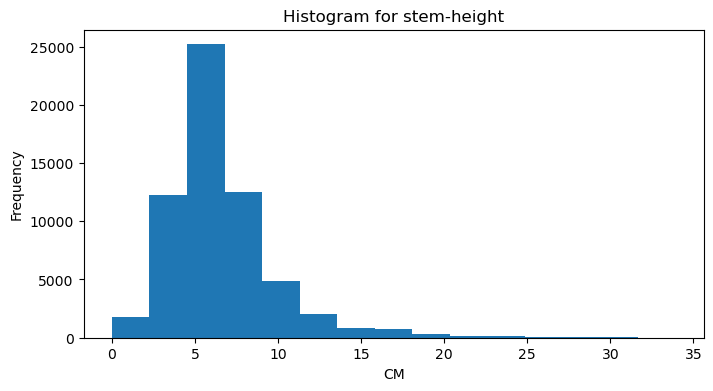

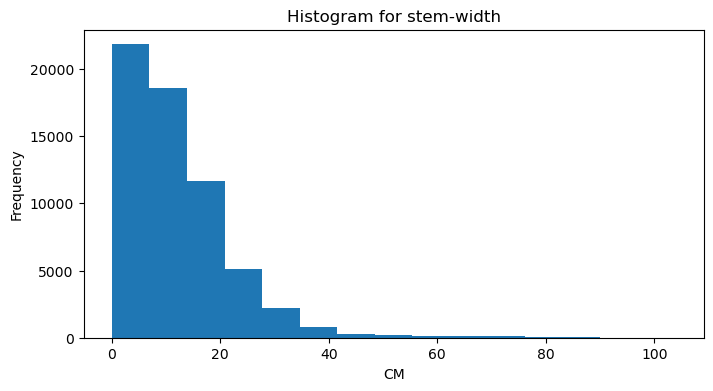

In [234]:
# draw histogram for all numerical columns
numerical_columns = df.select_dtypes(include='number')

for column in numerical_columns:
    fig, ax = plt.subplots(figsize=(8, 4))
    df[column].plot(kind='hist', title=f"Histogram for {column}", ax=ax,bins=15)
    ax.set_xlabel("CM")
    plt.show()


By the histogram plot, we can see `cap-diameter` and `stem-width` are right skewed. And only `stem-height` is normal distributive.

## Bar chart among 2 target variables

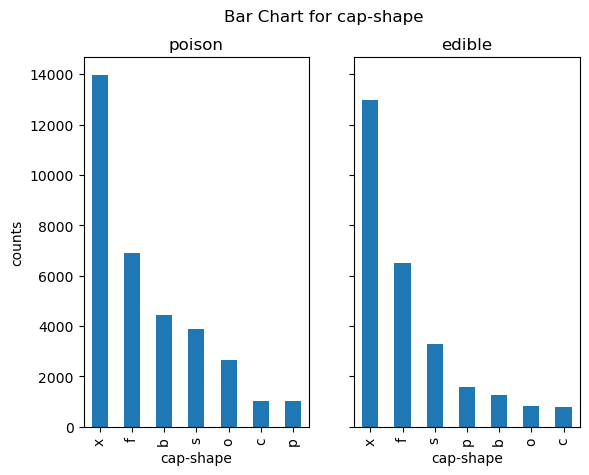

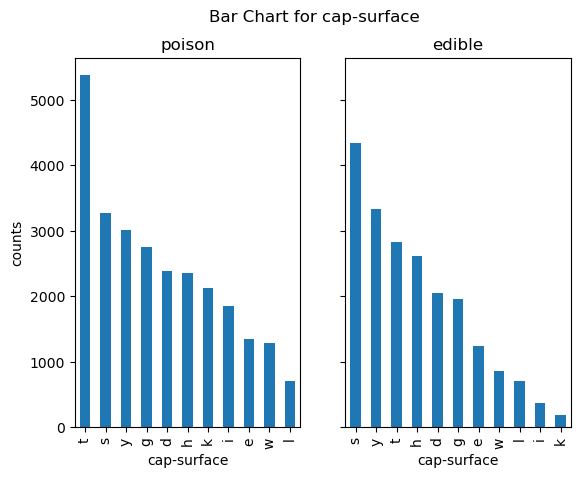

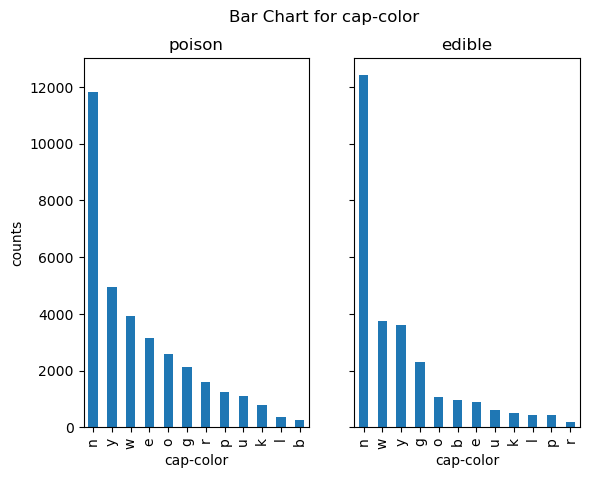

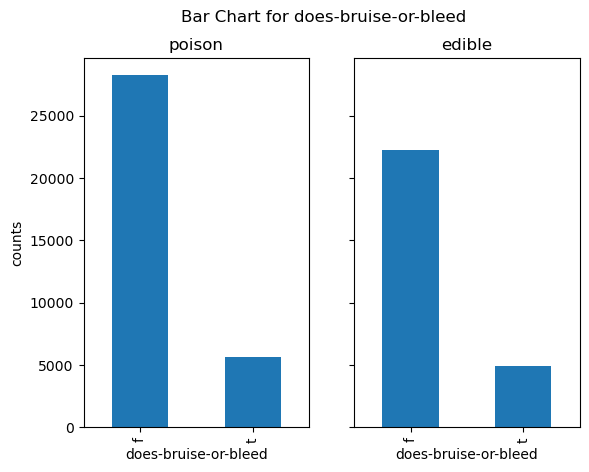

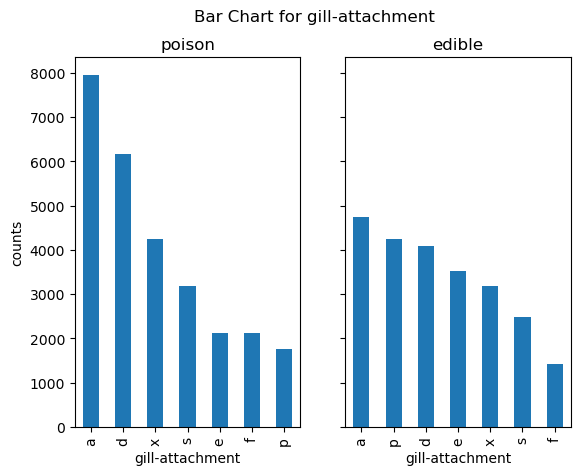

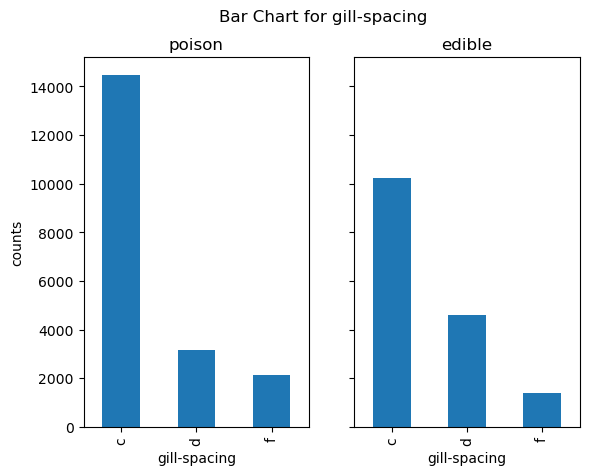

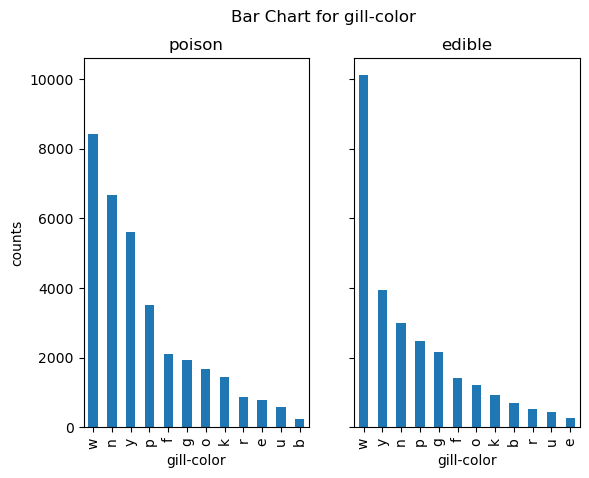

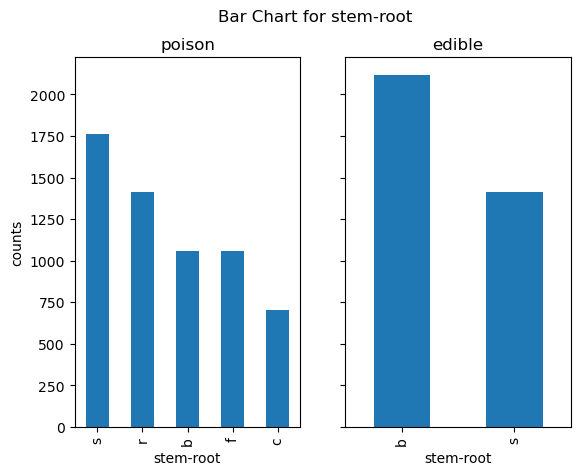

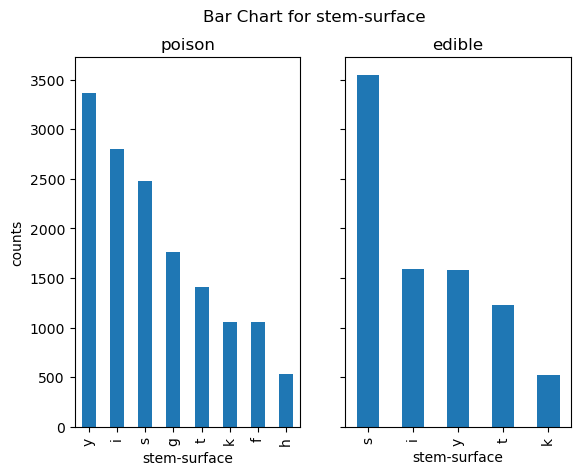

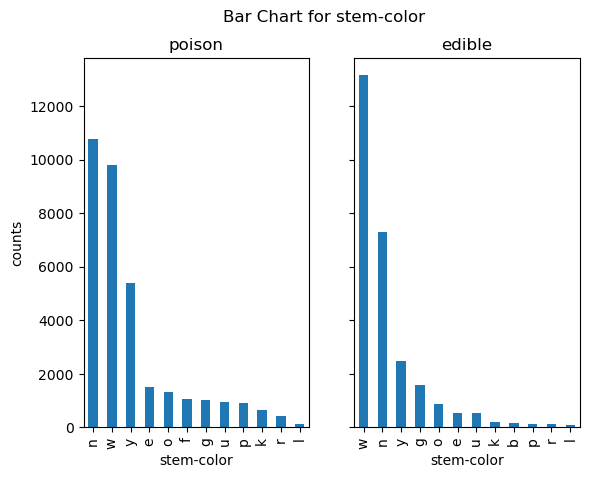

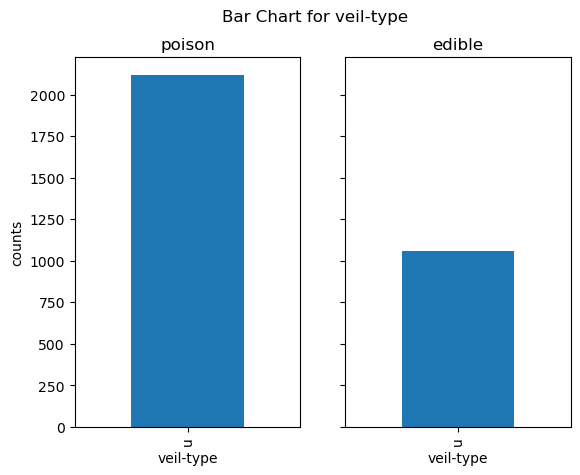

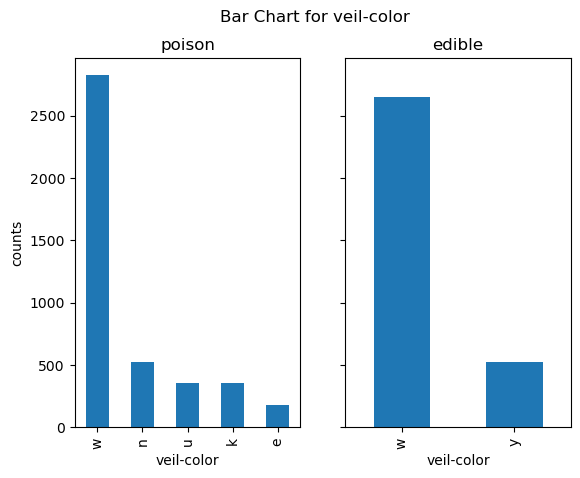

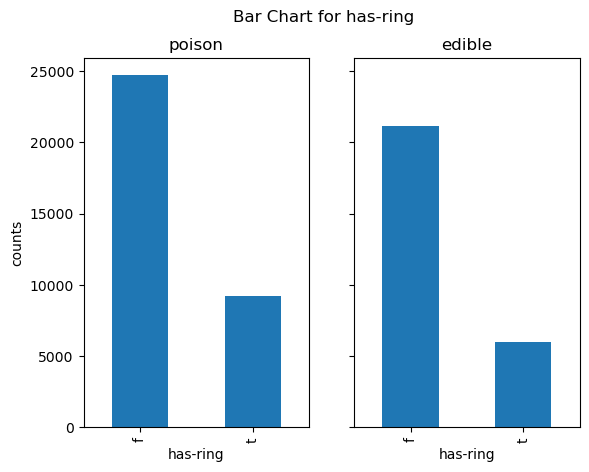

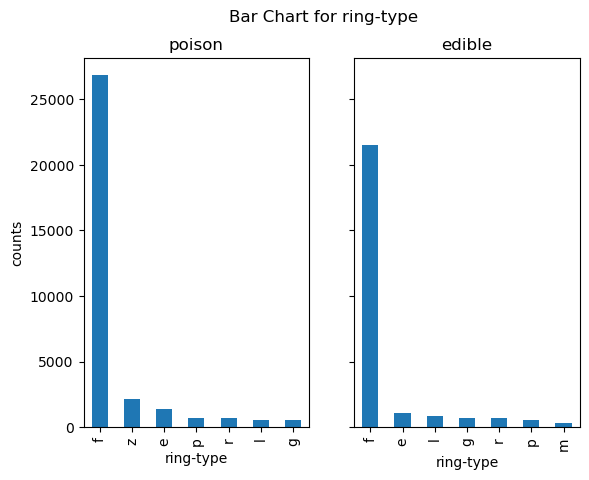

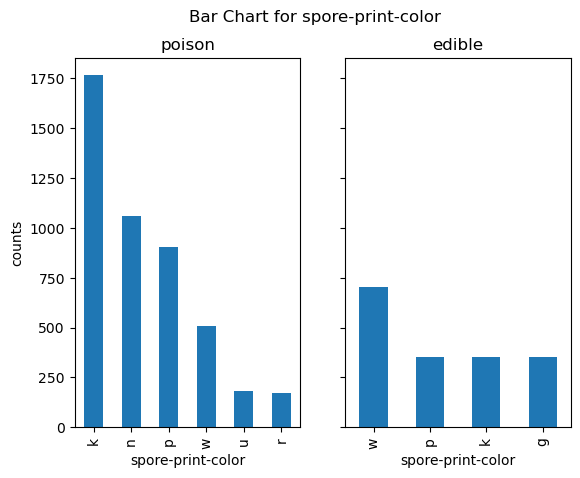

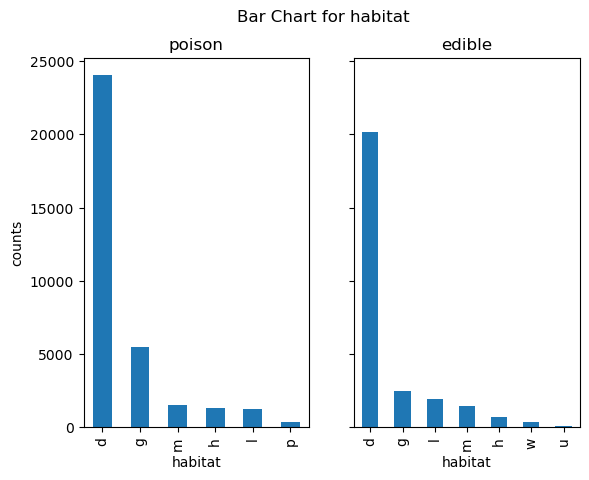

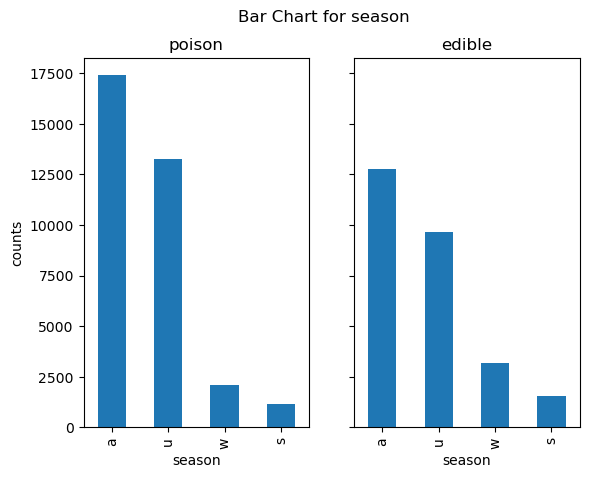

In [235]:
object_columns = df.select_dtypes(include=['object']).columns[1:]

for column in object_columns:
    # Count the occurrences of each category
    poison_C = poison[column].value_counts()
    edible_C = edible[column].value_counts()
    
    # Create a subplot chart
    fig,ax = plt.subplots(1,2,sharey=True)
    
    poison_C.plot(kind='bar',ax=ax[0],title='poison',ylabel='counts')
    edible_C.plot(kind='bar',ax=ax[1],title='edible')
    

    
    fig.suptitle(f'Bar Chart for {column}')
    
    # Show the plot
    plt.show()

By the above bar charts, we can find some pattern to classify poisonous mushroom by categorical features. For example, In `season` bar chart, we can see most poisonous mushrooms live in autumn and summer. And we can find pattern in `veil-color` as well. We can easily classify the mushrooms with yellow veil is edible since there is no poisonous mushroom with yell veil. All the `veil-type` are universal, other than that are missing values.

## Missing values

In [236]:
NA_dict = dict()
for column in df.columns[1:]:
    NA_dict[column] = df[column].isna().sum()

NA_dict

{'cap-diameter': 0,
 'cap-shape': 0,
 'cap-surface': 14120,
 'cap-color': 0,
 'does-bruise-or-bleed': 0,
 'gill-attachment': 9884,
 'gill-spacing': 25063,
 'gill-color': 0,
 'stem-height': 0,
 'stem-width': 0,
 'stem-root': 51538,
 'stem-surface': 38124,
 'stem-color': 0,
 'veil-type': 57892,
 'veil-color': 53656,
 'has-ring': 0,
 'ring-type': 2471,
 'spore-print-color': 54715,
 'habitat': 0,
 'season': 0}

`cap-surface`,`gill-attachment`,`gill-spacing`,`stem-root`,`stem-surface`,`veil-type`,`veil-color`,`ring-type`,`spore-print-color` have missing values. And all of them are categorical. All the missing values here might means unknown or not applicable. I decide to impute them using "?", since I have no idea how these missing values appear and cannot apply imputation strategy like mode or k_nearest. We can let the model to decide and find pattern when they meet the missing values "?".

In [237]:
df= df.fillna('?')

## Feature engineering

In [238]:
y = df.iloc[:,0]
y.replace({"e":1,"p":0},inplace=True)
X = df.iloc[:,1:]
X = pd.get_dummies(X) # encode categorical data by one-hot-encoding
X = X.astype(float) # convert true and false to 1 and 0
X

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_?,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.60,17.99,18.19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.07,17.80,17.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.17,15.77,15.98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14.64,16.53,17.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61065,1.27,3.18,5.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61066,1.27,3.86,6.37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61067,1.24,3.56,5.44,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Most columns are categorical, so we need to one-hot-encode the categorical columns. Therefore the models can fit the dataset easier.

## Outlier detection

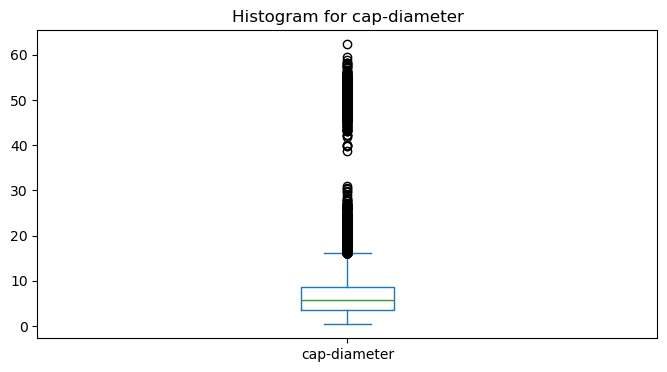

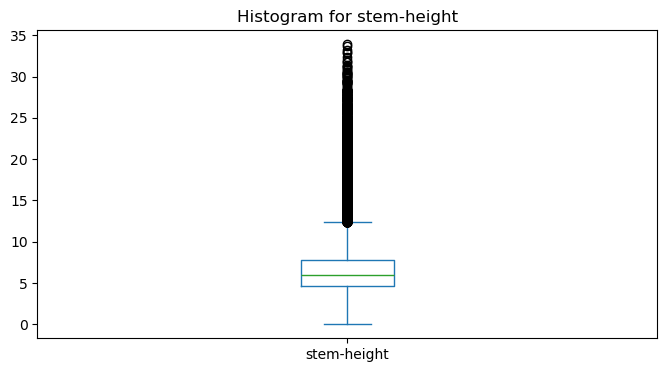

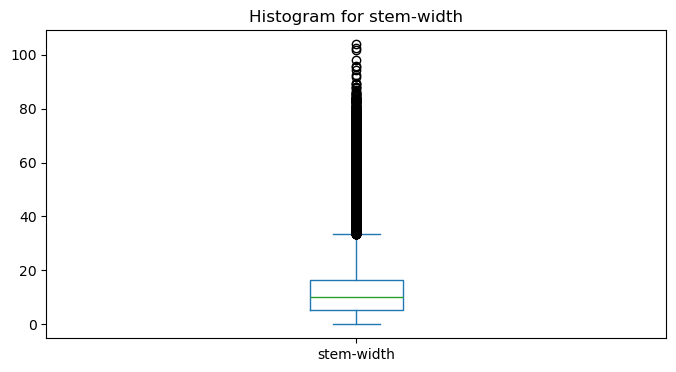

In [239]:
for column in numerical_columns:
    fig, ax = plt.subplots(figsize=(8, 4))
    df[column].plot(kind='box', title=f"Histogram for {column}", ax=ax)
    plt.show()

By the box plot, we can see there are a lot of outlier in the positive side for all numerical columns.

In [240]:
outliers_dict = dict()

for column in numerical_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].loc[:,column]

    outliers_dict[column] = outliers.count()

In [241]:
outliers_dict

{'cap-diameter': 2400, 'stem-height': 3169, 'stem-width': 1967}

Since the amount of outliers is small compare with the total rows, I will not remove any outliers. And I will use ensemble model. They are able to handle the outliers.

# Model Training and Evaluation

In [242]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [243]:
np.unique(train_y)

array([0, 1], dtype=int64)

## Logistic Regression

In [244]:
import numpy as np
import pandas as pd

class MyLogisticRegression:
    
    def __init__(self, epochs = 10000, threshold=1e-3,
                 regularization=None,alpha=0.01) -> None:
        
        # Initialize parameters and flags for the model.
        self.epochs = epochs
        self.threshold = threshold
        self.regularization = regularization
        self.alpha = alpha
    
    
    def train(self, X, y, batch_size=64, lr=1e-3, seed=11, verbose=False):
        """
        Train the model using stochastic gradient descent.
        """
        # Set seed for reproducibility.
        np.random.seed(seed) 
        
        # Define the unique classes and their corresponding indices.
        self.classes = np.unique(y)
        self.class_labels = {c: i for i, c in enumerate(self.classes)}
        
        # Add bias term to the features.
        X = self.add_bias(X)
        
        # Convert labels into one-hot encoded format.
        y = self.one_hot(y)
        
        # Initialize weights matrix with zeros.
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes), X.shape[1]))
        
        # Start the training process.
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
    
    
    
    def fit_data(self, X, y, batch_size, lr, verbose):
        """
        Fit the data using stochastic gradient descent.
        """
        i = 0
        while (not self.epochs or i < self.epochs):
            # Compute and store the cross-entropy loss.
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            
            # Randomly select a batch of data.
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            
            # Calculate the error between predicted and true values.
            error = y_batch - self.predict_(X_batch)
            
            # Update the weights based on the error and learning rate.
            update = lr * np.dot(error.T, X_batch)

            # Apply regularization if specified.
            if self.regularization == 'Ridge':
                update += self.alpha * self.weights
            elif self.regularization == 'Lasso':
                update += self.alpha * np.sign(self.weights)
            elif self.regularization == 'Elastic Net':
                update_w += self.alpha * (self.weights + np.sign(self.weights))

            self.weights += update

            # Stop training if updates are smaller than a threshold.
            if np.abs(update).max() < self.threshold: 
                break
            
            # Print training accuracy every 1000 iterations if verbose is True.
            if i % 1000 == 0 and verbose: 
                print(' Training Accuracy at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i += 1
        
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        '''
        Accuracy metric
        '''
        return round(np.mean(self.predict_classes(X).reshape(-1,1) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))
    
    def confusion_matrix(self, actual, predicted,norm=False):
        """
        Compute the confusion matrix for the given actual and predicted outputs.

        Args:
        - actual (array-like): Actual outputs (ground truth).
        - predicted (array-like): Predicted outputs from the model.

        Returns:
        - matrix (np.ndarray): N x N confusion matrix, where N is the number of unique classes.
        """
      
        # Create an empty matrix
        matrix = np.zeros((len(self.classes), len(self.classes)), dtype=float)

        # Fill the matrix
        for i, true_class in enumerate(self.classes):
            for j, pred_class in enumerate(self.classes):
                matrix[i, j] = np.sum((actual == true_class) & (predicted == pred_class))

        if norm:
            for i in range(len(self.classes)):
                total = np.sum(matrix[i])
                for j in range(len(self.classes)):
                    matrix[i,j] = round(matrix[i,j] / total,2)
        
        matrix_df = pd.DataFrame(matrix, index=self.classes, columns=self.classes)
        return matrix_df
        

In [245]:
X

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_?,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.60,17.99,18.19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.07,17.80,17.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.17,15.77,15.98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14.64,16.53,17.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61065,1.27,3.18,5.43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61066,1.27,3.86,6.37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61067,1.24,3.56,5.44,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [246]:
lm = MyLogisticRegression()
lm.train(train_X.values,train_y.values)

### Training set evaluation

In [247]:
pred_train_y = lm.predict_classes(train_X)
lm.confusion_matrix(train_y,pred_train_y)


,0,1
0,19670.0,7378.0
1,1624.0,20183.0


logistic regression can classify `e` much better than p, but the overall performance is great. We treat e(1) as positive and p(0) as negative, then if we misclassify e to p, we call it type 1 error(false positive). And misclassify p as e, we call it type 2 error(false negative). Type 2 is bad for this case, because people eat the poisonous mushrooms which were classified as edible. Therefore, we should increase the overall accuracy or decrease the type 2 error.

In [248]:
print(f'accuracy: {np.mean(pred_train_y == train_y)}')

accuracy: 0.8157404564527684


Logistic regression perform great in training set, acquire 81.5% accuracy.

### Test set evaluation

In [249]:
pred_test_y = lm.predict_classes(test_X)
lm.confusion_matrix(test_y,pred_test_y)

,0,1
0,4975.0,1865.0
1,440.0,4934.0


In [250]:
print(f'accuracy: {np.mean(pred_test_y == test_y)}')

accuracy: 0.8112821352546259


## Decision Tree

In [251]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # Used for leaf node
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if depth is None or depth < self.max_depth:
            if len(set(y)) == 1:
                return Node(value=y[0])

            best_feat, best_thresh = self._best_split(X, y, num_features)
            if best_feat is not None:
                left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
                left_child = self._build_tree(X[left_idxs], y[left_idxs], depth + 1)
                right_child = self._build_tree(X[right_idxs], y[right_idxs], depth + 1)
                return Node(feature_index=best_feat, threshold=best_thresh, left=left_child, right=right_child)

        return Node(value=self._most_common_label(y))

    def _best_split(self, X, y, num_features):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in range(num_features):
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx, split_thresh = feat_idx, threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # Parent loss
        parent_loss = self._gini(y)

        # Generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        # Weighted average of child loss
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._gini(y[left_idxs]), self._gini(y[right_idxs])
        child_loss = (n_l / n) * e_l + (n_r / n) * e_r

        # Information gain
        ig = parent_loss - child_loss
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        return 1 - sum(probabilities**2)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


In [252]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(train_X,train_y)

InvalidIndexError: (slice(None, None, None), 0)

In [253]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_X.values,train_y.values.reshape(-1,1))
pred_y = dt.predict(test_X)

In [254]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,pred_y)

0.9987719010971017

In [255]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## KNN

In [256]:
import numpy as np
class KNN:
    
    def __init__(self,k=3):
        self.k = k
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        
    def predict(self,X):
        pred_y = [self._predict(x) for x in X]
        return np.array(pred_y) 
        
    
    def _predict(self,x):
        
        distances = np.linalg.norm(self.X_train - x, axis=1)

        # Find the indices of the k nearest neighbors
        k_index = np.argpartition(distances, self.k)[:self.k]

        # Retrieve the labels of the k nearest neighbors
        k_nearest_labels = self.y_train[k_index]
        
        return np.argmax(np.bincount(k_nearest_labels))


In [257]:
from pca import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_transform = pca.transform(X)
X_transform = pd.DataFrame(X_transform,columns=['PC1',"PC2"])
train_X,test_X,train_y,test_y = train_test_split(X_transform,y,test_size=0.2,random_state=42)

In [272]:
knn = KNN(k=247)
knn.fit(train_X.values,train_y.values)
pred_y = knn.predict(train_X.values)

### Training set

In [269]:
pred_y = knn.predict(train_X.values)

In [270]:
np.mean(pred_y == train_y)

0.715423191075632

###  Test set

In [273]:
pred_y = knn.predict(test_X.values)
np.mean(pred_y == test_y)

0.6931390207958081

# Model selection